## Use google colab for faster results.
### - Following few sections are from google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Fri Jun 11 04:07:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Code Starts from here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)


x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Note: make sure you are using the GPU for this.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 7ms/step - loss: 1.3192 - accuracy: 0.5424 - val_loss: 1.1104 - val_accuracy: 0.6225
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8468 - accuracy: 0.7050 - val_loss: 0.7686 - val_accuracy: 0.7412
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6922 - accuracy: 0.7642 - val_loss: 0.7108 - val_accuracy: 0.7580
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5826 - accuracy: 0.8028 - val_loss: 0.6817 - val_accuracy: 0.7671
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4908 - accuracy: 0.8326 - val_loss: 0.5963 - val_accuracy: 0.8088
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4189 - accuracy: 0.8548 - val_loss: 0.6001 - val_accuracy: 0.8097
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3565 - accuracy: 0.8758 - val_loss: 0.6324 - val_ac

Retrain data with augmentation

Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off.

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5490 - accuracy: 0.8262 - val_loss: 0.5002 - val_accuracy: 0.8378
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.4344 - accuracy: 0.8563 - val_loss: 0.4931 - val_accuracy: 0.8438
Epoch 3/50
1562/1562 [==============================] - 27s 18ms/step - loss: 0.4094 - accuracy: 0.8647 - val_loss: 0.4649 - val_accuracy: 0.8507
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3784 - accuracy: 0.8732 - val_loss: 0.4300 - val_accuracy: 0.8629
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3628 - accuracy: 0.8792 - val_loss: 0.4366 - val_accuracy: 0.8611
Epoch 6/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3452 - accuracy: 0.8834 - val_loss: 0.4672 - val_accuracy: 0.8493
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3373 - accuracy: 0.8852 - val_loss: 0.4896 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.8788


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8787999749183655


In [ ]:
print("Test LOSS: {}".format(test_loss))

Test LOSS: 0.4672577977180481


In [ ]:
y_predicted = model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score (y_test, np.argmax(y_predicted, axis = 1)))

0.8788


In [ ]:
print(metrics.classification_report (y_test, np.argmax(y_predicted, axis = 1)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1000
           1       0.96      0.94      0.95      1000
           2       0.89      0.79      0.84      1000
           3       0.77      0.77      0.77      1000
           4       0.87      0.87      0.87      1000
           5       0.87      0.77      0.82      1000
           6       0.77      0.97      0.86      1000
           7       0.94      0.91      0.93      1000
           8       0.94      0.92      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Let's plot Loss

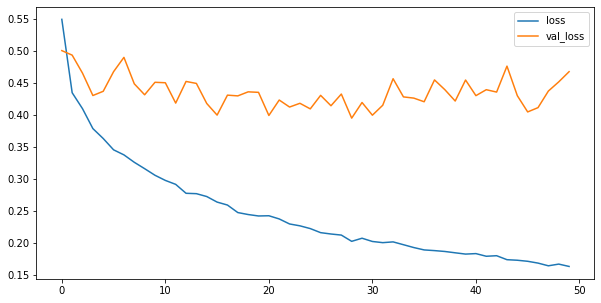

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Let's plot Accuracy

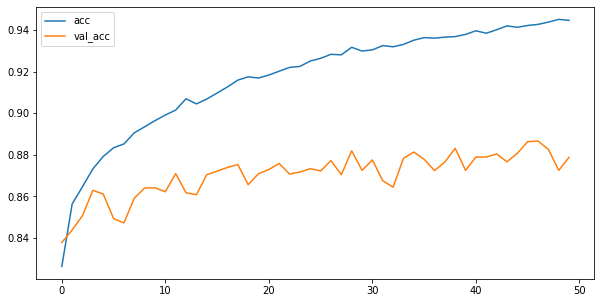

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Now plot the confusion matrix

Confusion matrix, without normalization
[[907   5  16   7   8   3  11   4  27  12]
 [  7 945   1   1   0   0   7   1   9  29]
 [ 31   0 794  28  37  20  72  11   4   3]
 [ 11   2  18 767  31  60  90  14   4   3]
 [  8   1  21  25 866  15  48  14   1   1]
 [  6   0  17 119  26 774  39  13   3   3]
 [  3   1  10  12   3   0 970   1   0   0]
 [  8   0  11  22  22  12  10 913   0   2]
 [ 30   7   2   7   2   2   8   1 924  17]
 [ 15  28   2   4   1   1  12   1   8 928]]


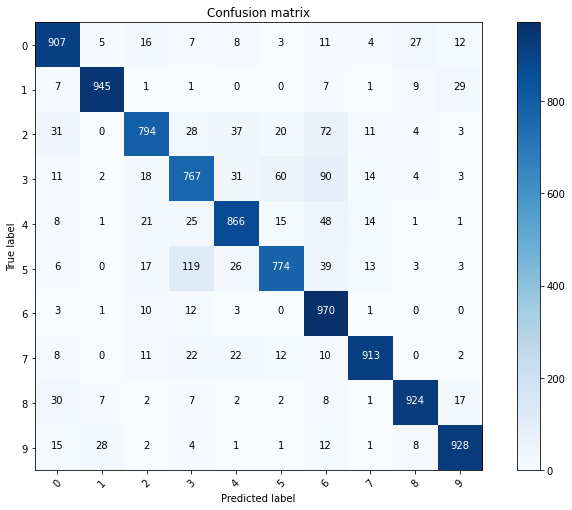

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Define the Labels

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Check the Right predictions

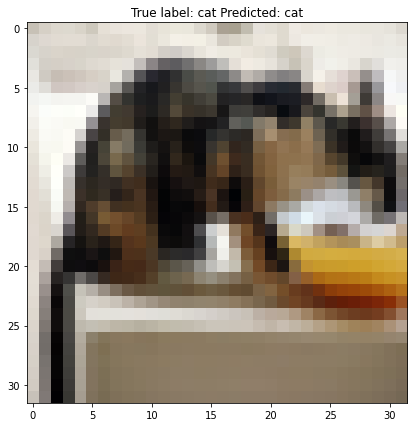

In [ ]:
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

Check the wrong predictions

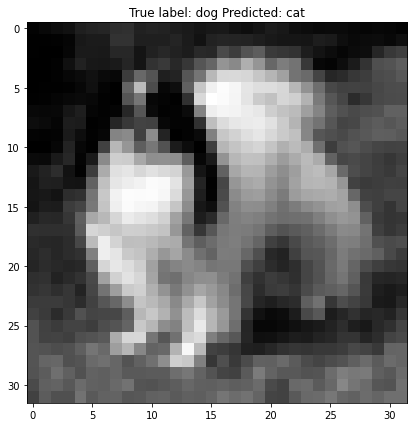

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));